<a href="https://colab.research.google.com/github/MuhammedMTP/Final-Project/blob/main/data_analytics_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Analytics Final Project
##BMW sales data (2010-2024)


#Installing libraries

!pip install python-pptx --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files, drive
drive.mount('/content/drive')

print("Libraries Ready.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Libraries Ready.


In [ ]:
# Uploading Data File

from google.colab import files
uploaded = files.upload()  #chooshing the file
for fn in uploaded.keys():
    print("Uploaded file:", fn)

Saving BMW sales data (2010-2024) (1).csv to BMW sales data (2010-2024) (1) (1).csv
Uploaded file: BMW sales data (2010-2024) (1) (1).csv


In [ ]:
# Loading the Dataset for Inspecting

df = pd.read_csv("BMW sales data (2010-2024) (1) (1).csv")
print("Shape:", df.shape)
display(df.head(10))
print("\nInfo:")
display(df.info())
print("\nNumeric summary:")
display(df.describe(include='all').transpose())
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


None


Numeric summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.0157,4.324459,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,3.24718,1.009078,1.5,2.4,3.2,4.1,5.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.20314,57941.509344,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6009,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51468,2856.767125,100.0,2588.0,5087.0,7537.25,9999.0



Missing values per column:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


In [ ]:
# Data Cleaning and Preprocessing
# Handling missing data, duplicates, derived features, transformation and etc.

df_clean = df.copy() #copying orginal dataset for cleaning.

In [ ]:
# 1) Duplicates
dups = df_clean.duplicated().sum()
print("Exact duplicate rows:", dups)
if dups > 0:
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)

Exact duplicate rows: 0


In [ ]:
# 2) Data types corrections
if not np.issubdtype(df_clean['Year'].dtype, np.integer):
    df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce').astype('Int64')

In [ ]:
# 3) Missing value
missing = df_clean.isnull().sum()
print("Missing values before handling:\n", missing)

# strategy for replacing missing values
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object','category']).columns.tolist()

for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled numeric {col} with median = {median_val}")

for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"Filled categorical {col} with 'Unknown'")

        print(" Data cleaned and derived features added successfully.")
df_clean.head()


Missing values before handling:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Revenue_USD             0
Model_Age_2025          0
Price_per_Engine_L      0
Model_Grouped           0
dtype: int64


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue_USD,Model_Age_2025,Price_per_Engine_L,Model_Grouped
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000,9,28211.428571,5 Series
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732,12,49511.875000,i8
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410,3,25170.000000,5 Series
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637,1,35865.294118,X3
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840,5,23760.952381,7 Series


In [ ]:
# 4) Derived Features
#Calculates the total revenue (in USD) generated by each model or observation.
df_clean['Revenue_USD'] = df_clean['Price_USD'] * df_clean['Sales_Volume']
#Calculates how old each model will be in the year 2025.
df_clean['Model_Age_2025'] = 2025 - df_clean['Year'].astype(int)
#Calculates the price per liter of engine size, while avoiding division by zero.
df_clean['Price_per_Engine_L'] = df_clean['Price_USD'] / df_clean['Engine_Size_L'].replace(0, np.nan)
#Calculates the price per liter of engine size, while avoiding division by zero.
df_clean['Price_per_Engine_L'] = df_clean['Price_per_Engine_L'].fillna(df_clean['Price_per_Engine_L'].median())



In [ ]:
# 5) Group low-frequency models into 'Other' (top 10 )
top_models = df_clean['Model'].value_counts().nlargest(10).index
df_clean['Model_Grouped'] = df_clean['Model'].where(df_clean['Model'].isin(top_models), 'Other')

print("\nAfter cleaning shape:", df_clean.shape)
print("Missing values after handling:\n", df_clean.isnull().sum())


After cleaning shape: (50000, 15)
Missing values after handling:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Revenue_USD             0
Model_Age_2025          0
Price_per_Engine_L      0
Model_Grouped           0
dtype: int64


In [ ]:
# EDA & Visualization

# EDA and plots:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

plt.rcParams['figure.dpi'] = 120

def save_and_show(fig, fname):
    fig.savefig(fname, bbox_inches='tight', dpi=150)
    display(fig)
    plt.close(fig)

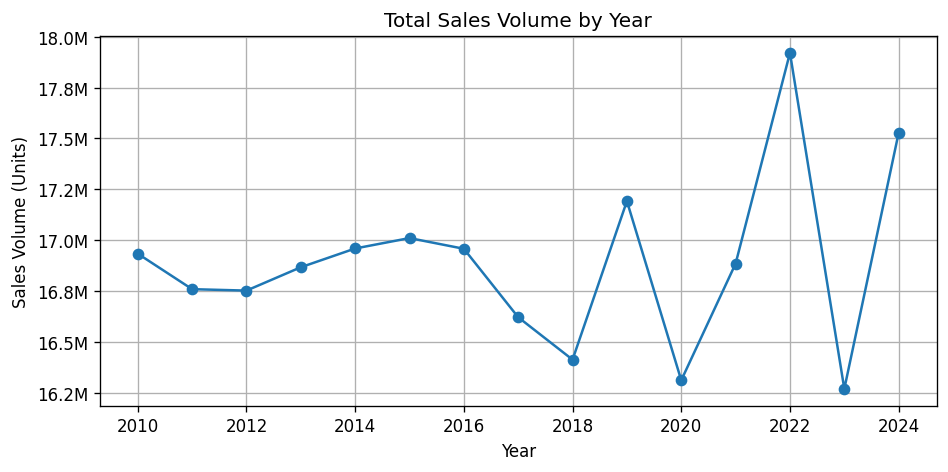

In [ ]:
# 1) Sales Volume by Year (line)
sales_by_year = df_clean.groupby('Year')['Sales_Volume'].sum().sort_index().astype(int) #

fig = plt.figure(figsize=(9,4))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')

plt.title('Total Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Sales Volume (Units)')
plt.grid(True)

# Format Y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

save_and_show(fig, 'sales_by_year.png')


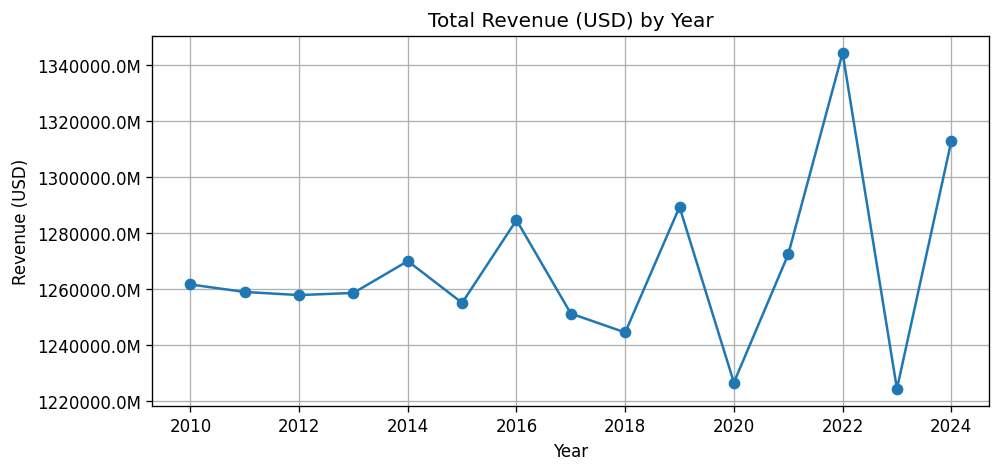

In [ ]:
# 2) Revenue by Year (line)

revenue_by_year = df_clean.groupby('Year')['Revenue_USD'].sum().sort_index()
fig = plt.figure(figsize=(9,4))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o')
plt.title('Total Revenue (USD) by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter (mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
save_and_show(fig, 'revenue_by_year.png')

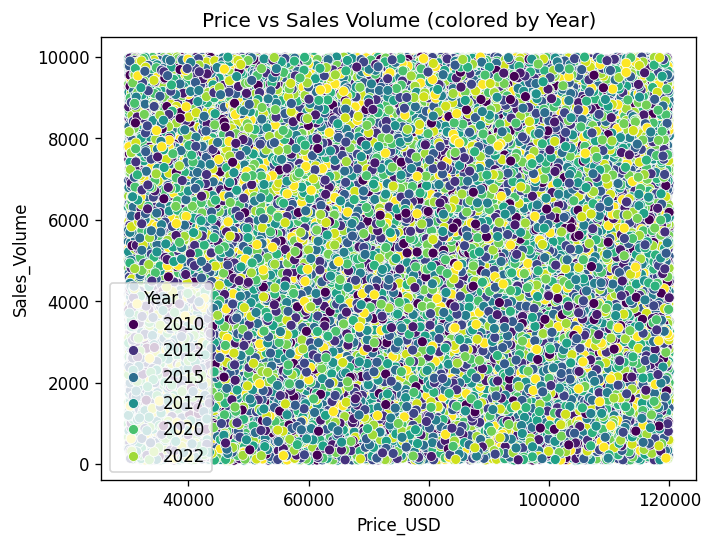

In [ ]:
# 3) Price vs Sales Volume
sns.scatterplot(data=df_clean, x='Price_USD', y='Sales_Volume', hue='Year', palette='viridis')
plt.title("Price vs Sales Volume (colored by Year)")
plt.show()


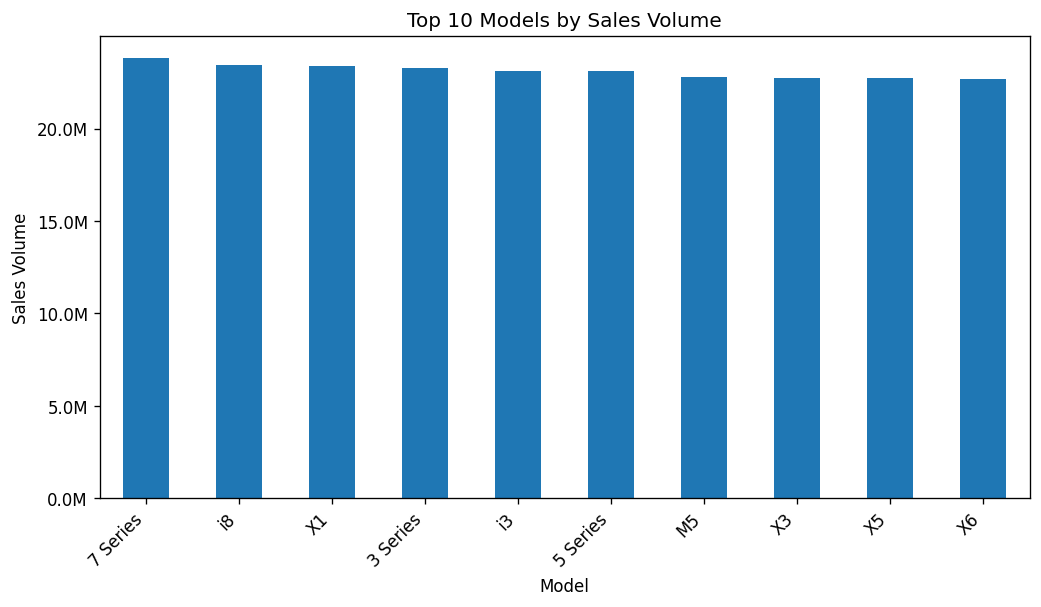

In [ ]:
# 4) Top 10 Models by Sales Volume (bar)

sales_by_model = df_clean.groupby('Model_Grouped')['Sales_Volume'].sum().sort_values(ascending=False)
fig = plt.figure(figsize=(10,5))
sales_by_model.head(10).plot(kind='bar')
plt.title('Top 10 Models by Sales Volume')
plt.xlabel('Model')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45, ha='right')


plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter (mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

save_and_show(fig, 'top_models.png')

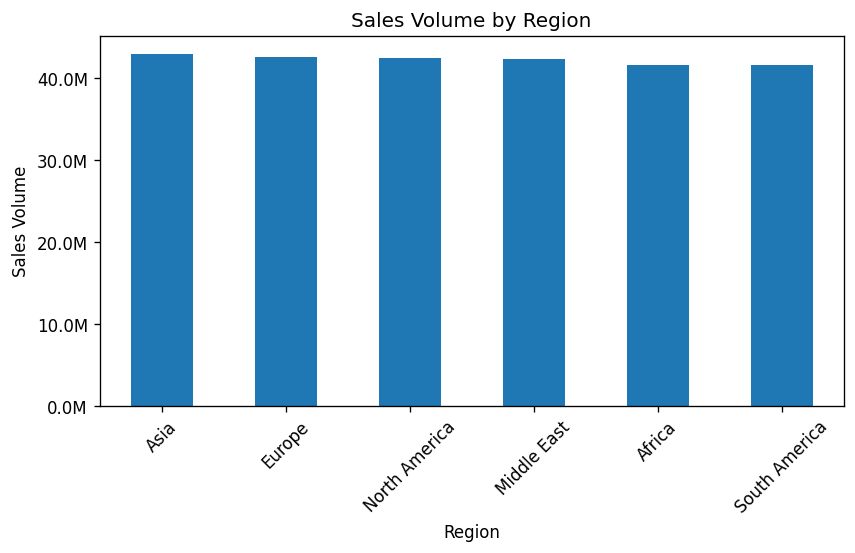

In [ ]:
# 5) Sales Volume by Region (bar)

sales_by_region = df_clean.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
fig = plt.figure(figsize=(8,4))
sales_by_region.plot(kind='bar')
plt.title('Sales Volume by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter (mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
save_and_show(fig, 'sales_by_region.png')

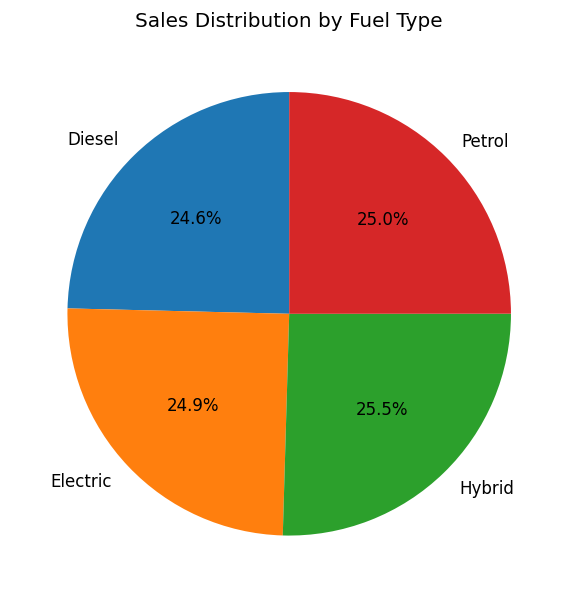

In [ ]:
# 6) Sales distribution by Fuel Type (pie)

fuel_dist = df_clean.groupby('Fuel_Type')['Sales_Volume'].sum()
fig = plt.figure(figsize=(6,6))
plt.pie(fuel_dist, labels=fuel_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Fuel Type')
save_and_show(fig, 'fuel_type_pie.png')

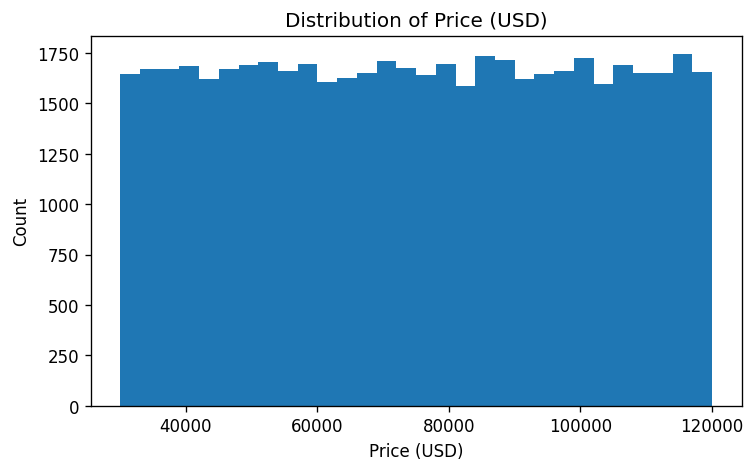

In [ ]:
# 7) Price distribution histogram

fig = plt.figure(figsize=(7,4))
plt.hist(df_clean['Price_USD'], bins=30)
plt.title('Distribution of Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
save_and_show(fig, 'price_hist.png')

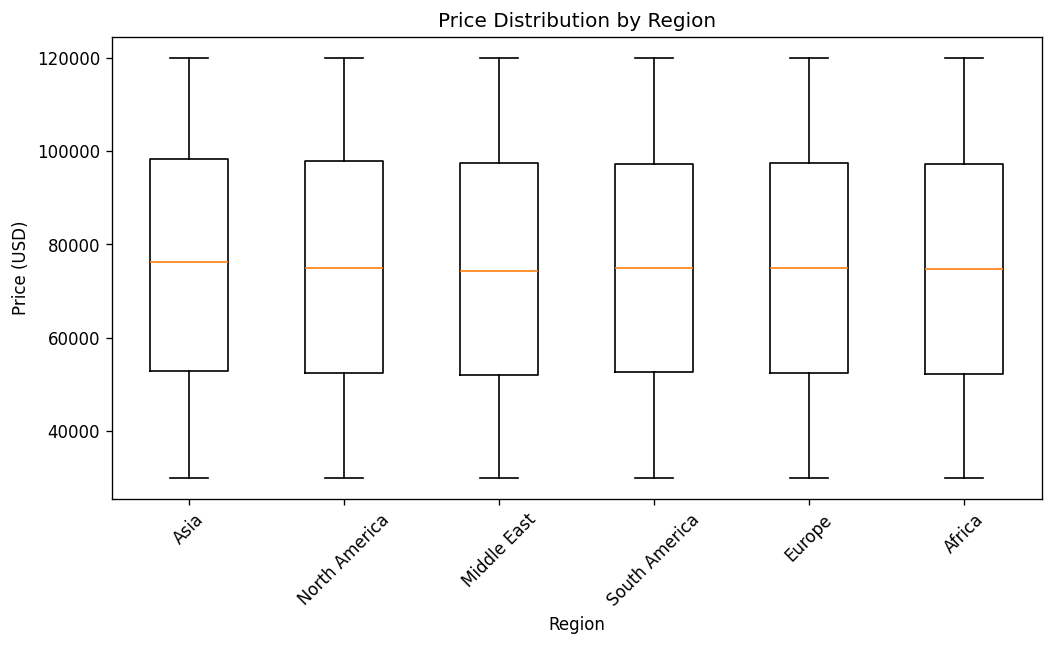

In [ ]:
# 8) Boxplot of Price by Region

regions = df_clean['Region'].unique()
data_for_box = [df_clean[df_clean['Region']==r]['Price_USD'] for r in regions]
fig = plt.figure(figsize=(10,5))
plt.boxplot(data_for_box,  tick_labels=regions)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
save_and_show(fig, 'price_by_region_box.png')

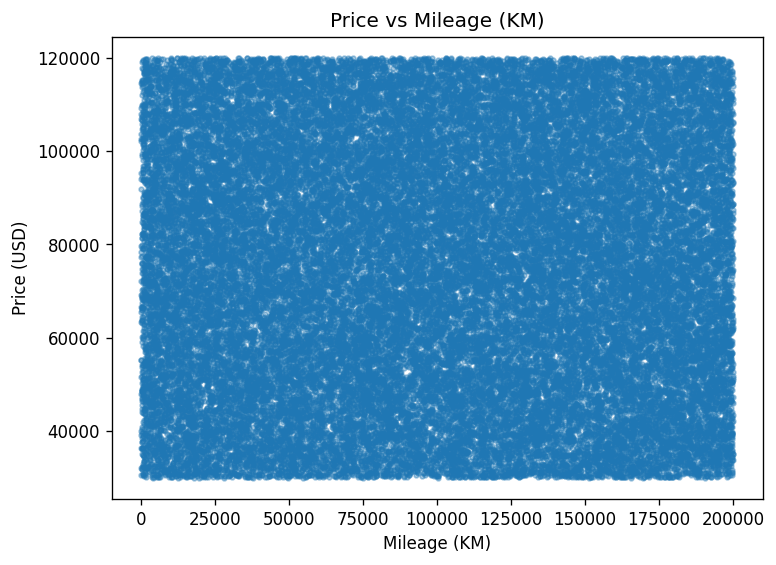

In [ ]:
# 9) Price vs Mileage scatter

fig = plt.figure(figsize=(7,5))
plt.scatter(df_clean['Mileage_KM'], df_clean['Price_USD'], alpha=0.4, s=8)
plt.title('Price vs Mileage (KM)')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
save_and_show(fig, 'price_vs_mileage.png')

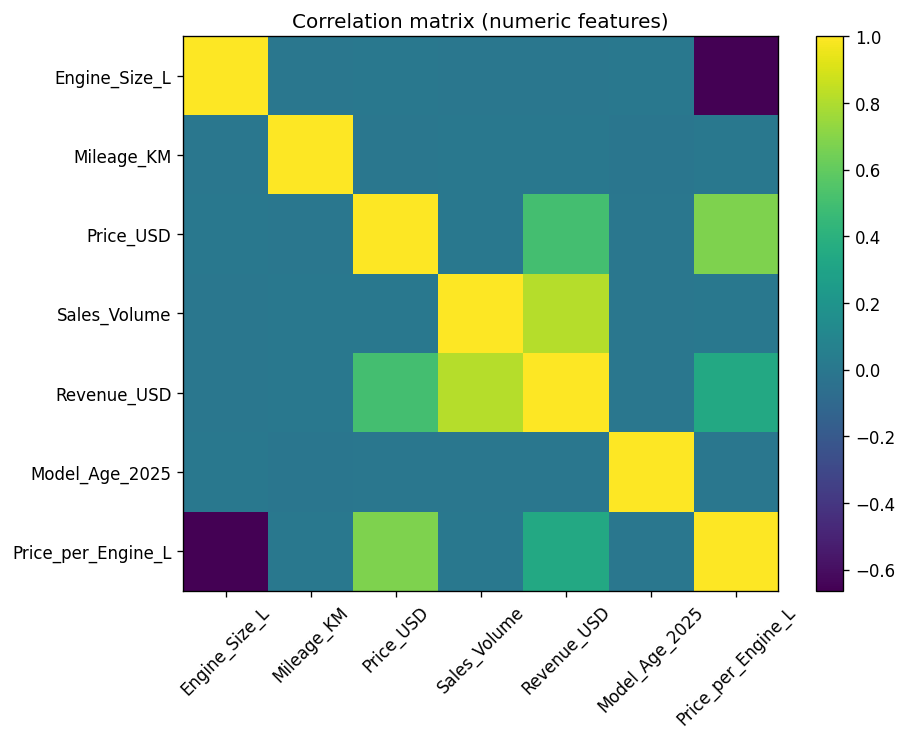

In [ ]:
# 10) Correlation heatmap (numeric columns)
num_cols = ['Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume','Revenue_USD','Model_Age_2025','Price_per_Engine_L']
corr = df_clean[num_cols].corr()
fig = plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation matrix (numeric features)')
save_and_show(fig, 'corr_matrix.png')

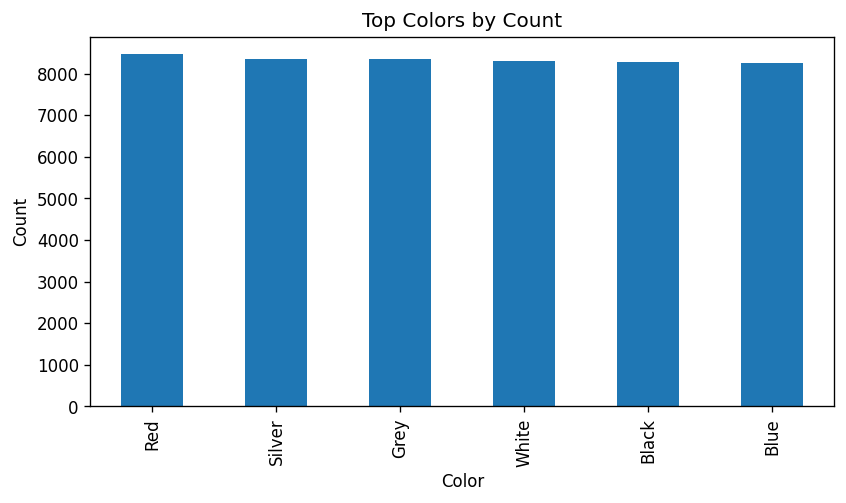

In [ ]:
# 11) Top colors by count (bar)
fig = plt.figure(figsize=(8,4))
df_clean['Color'].value_counts().head(8).plot(kind='bar')
plt.title('Top Colors by Count')
plt.xlabel('Color')
plt.ylabel('Count')
save_and_show(fig, 'top_colors.png')

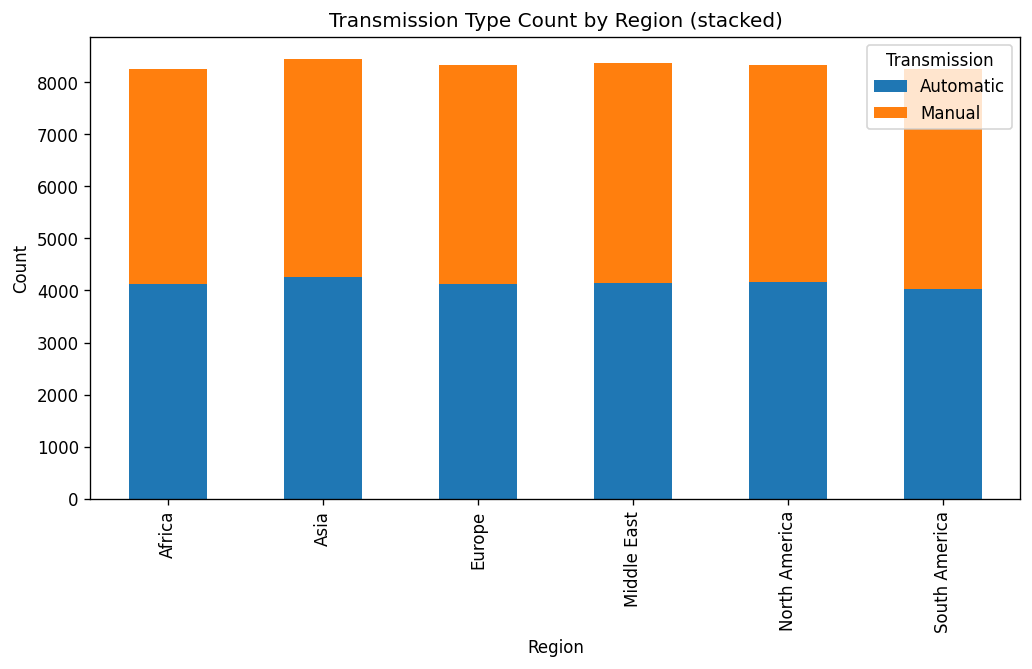

In [ ]:
# 12) Transmission counts per Region (stacked bar)

trans_region = pd.crosstab(df_clean['Region'], df_clean['Transmission'])
fig = trans_region.plot(kind='bar', stacked=True, figsize=(10,5)).figure
plt.title('Transmission Type Count by Region (stacked)')
plt.xlabel('Region')
plt.ylabel('Count')
save_and_show(fig, 'trans_by_region.png')

In [ ]:
df_clean.to_csv('BMW_sales_cleaned.csv', index=False)
sales_by_year.to_csv('sales_by_year.csv')
revenue_by_year.to_csv('revenue_by_year.csv')
sales_by_region.to_csv('sales_by_region.csv')

files.download('BMW_sales_cleaned.csv')
files.download('sales_by_year.csv')
files.download('revenue_by_year.csv')
files.download('sales_by_region.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>